# Pymaceuticals Inc.
---

### Analysis

Through the bar graph, it is shown that Capomulin had the most mice tested among the most while the least tested was Propiva. 

Capomulin seems to be very effective to treating tumor than Infubinol as it is displayed through the boxplots. 

There is a postive correlation to weight of the mice and the tumor size with a correlation value of 0.84 shown by the scatter plot. This means the heavier the mouse, the less effective Capomulin is to the tumor. 
 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, how="right", on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [136]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [137]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [138]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data_df.loc[combined_data_df["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [140]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).mean()
median = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).median()
var = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).var()
std = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).std()
sem = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean Tumor Volume": mean, 
                             "Median Tumor Volume": median,
                             "Tumor Volume Variance": var,
                             "Tumor Volume Std. Dev.": std,
                             "Tumor Volume Std. Err.": sem})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

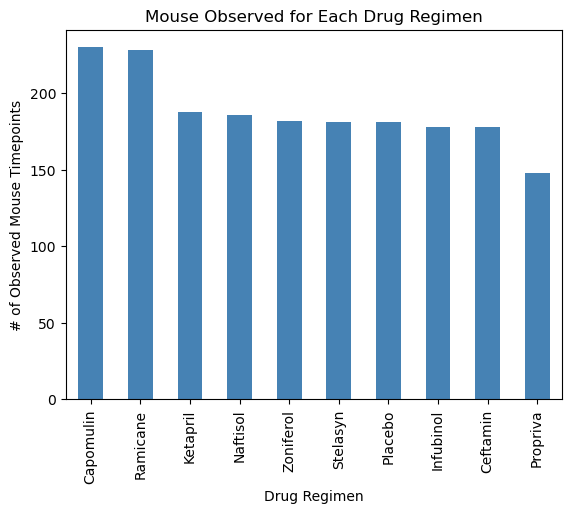

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_data_df["Drug Regimen"].value_counts()
drugbar = mice_count.plot.bar(color="steelblue")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Observed for Each Drug Regimen')
plt.show()


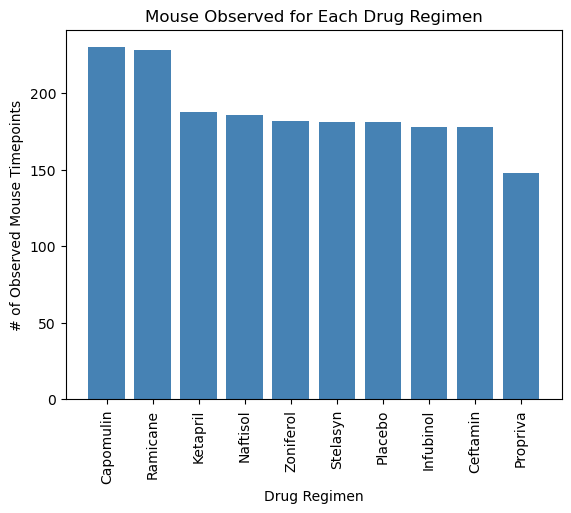

In [144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values 
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='steelblue',alpha=1, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Observed for Each Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

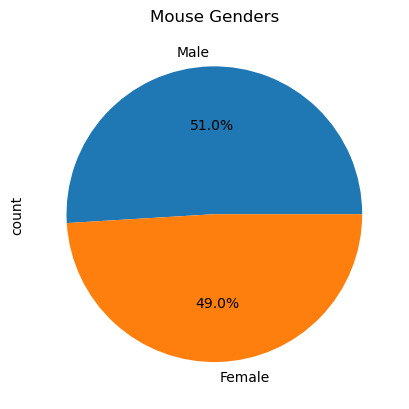

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title('Mouse Genders')
plt.show()

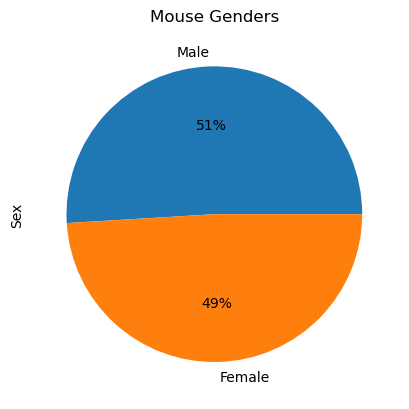

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [50.200803, 49.799197]
plot = gender_data.plot.pie(y='Count', autopct="%1.f%%")
plt.title('Mouse Genders')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data_df, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [148]:
# Getting the last (greatest) timepoint for each mouse
last_timepoint_timepoint = combined_data_df.groupby(["Mouse ID"]).max()
last_timepoint_reset = last_timepoint.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoint_reset[['Mouse ID','Timepoint']].merge(combined_data_df,on=['Mouse ID','Timepoint'],how="left")

# Putting treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = merged_df.loc[merged_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
cef = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


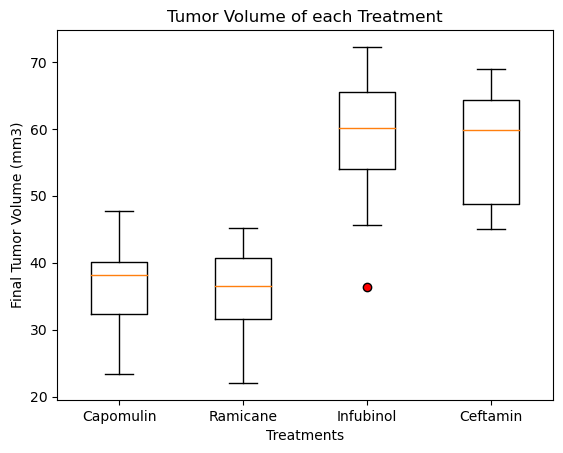

In [149]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor="red", markersize=6)
plt.boxplot([cap, ram, inf, cef], labels=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'], flierprops = red_dot)
plt.xlabel('Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume of each Treatment')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mice l509')

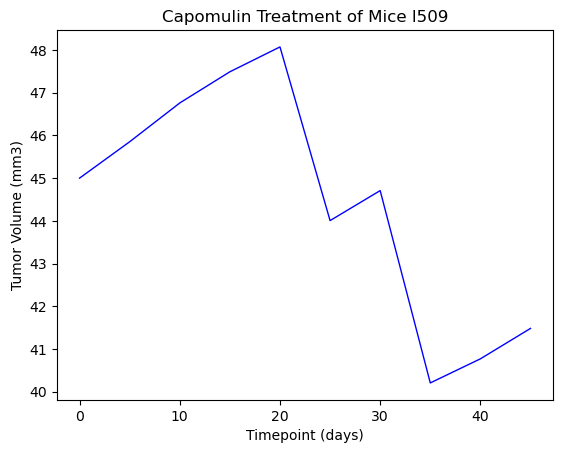

In [150]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
forline_df = capomulin_line.loc[capomulin_line["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
y_axis = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis, linewidth=1, color="b", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mice l509')

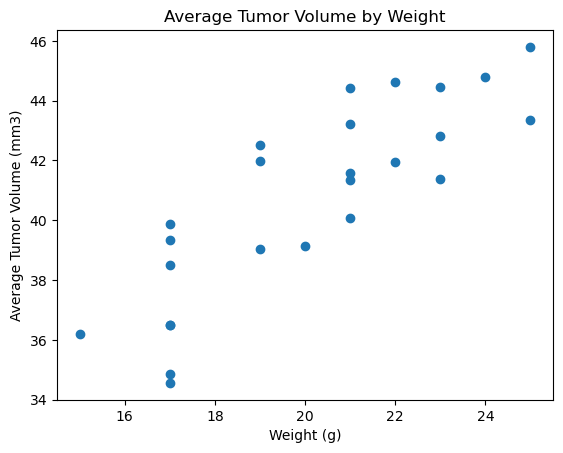

In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_line = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_df = pd.DataFrame(capomulin_line.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_df = pd.merge(capomulin_line, avg_df, on='Mouse ID')
final_avg_df = avg_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_df
x_values = final_avg_df['Weight (g)']
y_values = final_avg_df['avg_tumor_vol']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


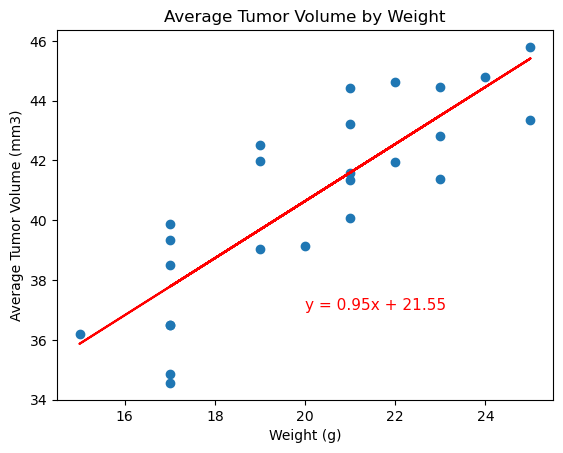

In [152]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_df = pd.DataFrame(capomulin_line.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_df = pd.merge(capomulin_line, avg_df, on='Mouse ID')
final_avg_df = avg_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_df
x_values = final_avg_df['Weight (g)']
y_values = final_avg_df['avg_tumor_vol']
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Correlation 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Linear regression 
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_values, y_values)
regress_value= x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value, regress_value,"r-")
plt.annotate(line_eq,(20,37), fontsize=11, color='r')
plt.show()

